In [171]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import cas as cas
import importlib
import pickle
import inspect
import json

The problem we want to solve is "Vertex Cover" (references [11]). This function computes ising coefficient, given the timestep we want to use. Note: parameters A and B and n° of timesteps (pts) influence the correctness of the result, since the optimization problem is not convex in general.

In [172]:
def vertex_cover_5(pts):
    
    #layout is a square with center point
    # for linear model just use np.linspace(0, 1, pts)
    
    ising_dict = {}
    s = np.linspace(0, 1, pts)
    ising_dict["points"] = pts

    ising_dict["x_0"] = (np.ones(pts)-np.linspace(1, 0, pts)**(1/2))*2*np.pi
    ising_dict["x_1"] = (np.ones(pts)-np.linspace(1, 0, pts)**(1/2))*2*np.pi
    ising_dict["x_2"] = (np.ones(pts)-np.linspace(1, 0, pts)**(1/2))*2*np.pi
    ising_dict["x_3"] = (np.ones(pts)-np.linspace(1, 0, pts)**(1/2))*2*np.pi
    ising_dict["x_4"] = (np.ones(pts)-np.linspace(1, 0, pts)**(1/2))*2*np.pi
    
    A = 0.15
    B = 0.08

    ising_dict["z_0"] = B*(np.linspace(1, 0, pts)**(1/2))*2*np.pi
    ising_dict["z_1"] = B*(np.linspace(1, 0, pts)**(1/2))*2*np.pi
    ising_dict["z_2"] = B*(np.linspace(1, 0, pts)**(1/2))*2*np.pi
    ising_dict["z_3"] = B*(np.linspace(1, 0, pts)**(1/2))*2*np.pi
    ising_dict["z_4"] = B*(np.linspace(1, 0, pts)**(1/2))*2*np.pi

    ising_dict["zz_0,1"] = -4*A*(np.linspace(1, 0, pts)**(1/2))*2*np.pi
    ising_dict["zz_0,2"] = -4*A*(np.linspace(1, 0, pts)**(1/2))*2*np.pi
    ising_dict["zz_0,3"] = -4*A*(np.linspace(1, 0, pts)**(1/2))*2*np.pi
    ising_dict["zz_1,2"] = -4*A*(np.linspace(1, 0, pts)**(1/2))*2*np.pi
    ising_dict["zz_1,4"] = -4*A*(np.linspace(1, 0, pts)**(1/2))*2*np.pi
    ising_dict["zz_2,3"] = -4*A*(np.linspace(1, 0, pts)**(1/2))*2*np.pi
    ising_dict["zz_2,4"] = -4*A*(np.linspace(1, 0, pts)**(1/2))*2*np.pi
    ising_dict["zz_3,4"] = -4*A*(np.linspace(1, 0, pts)**(1/2))*2*np.pi
    
    return ising_dict, s

Definition of qubits and couplers with same parameters as the reference's circuit

In [173]:
i_c = 230; c_shunt = 50; c_z = 4.4; lq = 480; alpha = 0.4; d = 0.0
qubit0 = cas.CSFQ(i_c, c_shunt, c_z, lq, alpha, d)
qubit1 = cas.CSFQ(i_c, c_shunt, c_z, lq, alpha, d)
qubit2 = cas.CSFQ(i_c, c_shunt, c_z, lq, alpha, d)
qubit3 = cas.CSFQ(i_c, c_shunt, c_z, lq, alpha, d)
qubit4 = cas.CSFQ(i_c, c_shunt, c_z, lq, alpha, d)

i_sigma = 565; c_sigma = 11; lc = 580; d = 0.0
coupler01 = cas.Coupler(i_sigma, c_sigma, lc, d)
coupler02 = cas.Coupler(i_sigma, c_sigma, lc, d)
coupler03 = cas.Coupler(i_sigma, c_sigma, lc, d)
coupler12 = cas.Coupler(i_sigma, c_sigma, lc, d)
coupler14 = cas.Coupler(i_sigma, c_sigma, lc, d)
coupler23 = cas.Coupler(i_sigma, c_sigma, lc, d)
coupler24 = cas.Coupler(i_sigma, c_sigma, lc, d)
coupler34 = cas.Coupler(i_sigma, c_sigma, lc, d)


In [174]:
elements = [qubit0, coupler01, coupler02, coupler03, qubit1, coupler12, coupler14, 
            qubit2, coupler23, coupler24, qubit3, coupler34, qubit4 ]

Computation of the mutual matrix

In [175]:
m = 65; m_mat = np.zeros((13,13))

m_mat[0, 1] = m 
m_mat[0, 2] = m 
m_mat[0, 3] = m 
m_mat[4, 1] = m
m_mat[4, 5] = m
m_mat[4, 6] = m
m_mat[7, 2] = m
m_mat[7, 5] = m
m_mat[7, 8] = m
m_mat[7, 9] = m
m_mat[10, 3] = m
m_mat[10, 8] = m
m_mat[10, 11] = m
m_mat[12, 6] = m
m_mat[12, 9] = m
m_mat[12, 11] = m

m_mat = -(m_mat + m_mat.T)

In [176]:
trunc_vec = np.array([6, 3, 3, 3, 6, 3, 3, 6, 3, 3, 6, 3, 6])

In [177]:
circuit = cas.AnnealingCircuit(elements, m_mat, trunc_vec)

In [178]:
ising_dict, s = vertex_cover_5(30)

IndexError: list index out of range

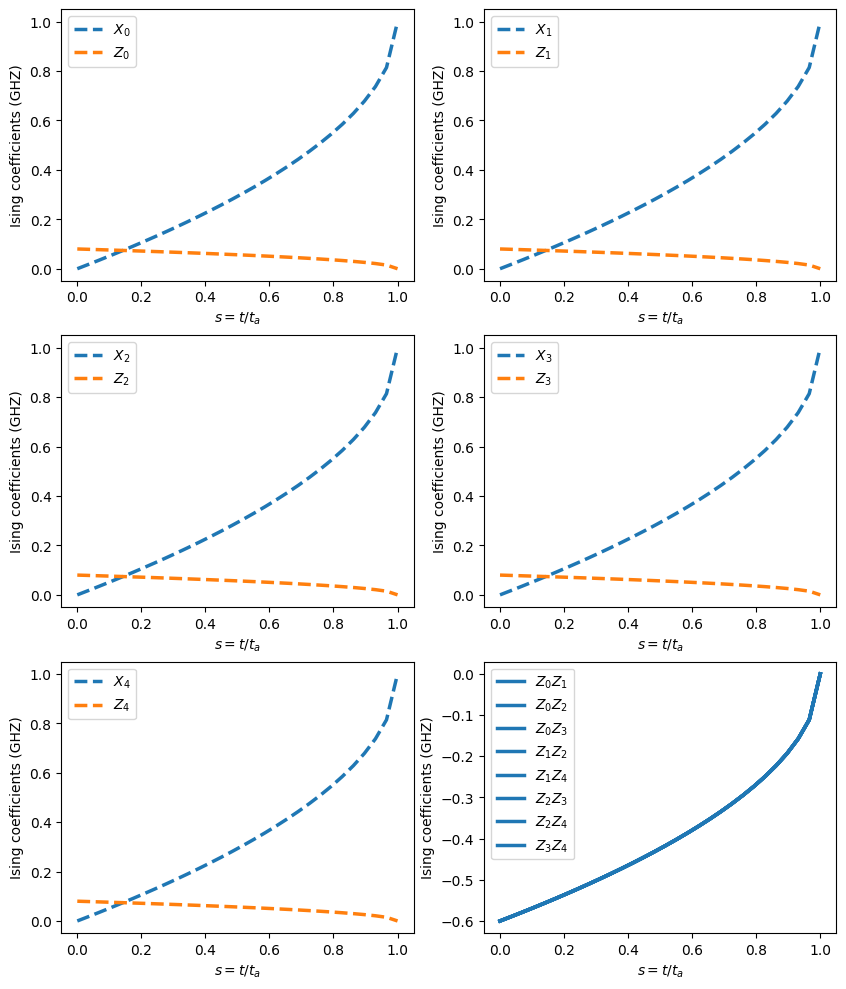

In [179]:
plt.clf()
fig = plt.figure(num=1)
fig.set_size_inches((10, 12))

for i in range(5):
    ax1 = plt.subplot(3, 2, i+1)
    
#    plt.plot(s, ising_sw_dict["x_"+str(i)]/2/np.pi, label=r"$X_{0:d}$".format(i), color="C0")
#    plt.plot(s, ising_sw_dict["z_"+str(i)]/2/np.pi, label=r"$Z_{0:d}$".format(i), color="C1")
    
    plt.plot(s, ising_dict["x_"+str(i)]/2/np.pi, color="C0", label=r"$X_{0:d}$".format(i), ls='--', lw=2.5 )
    plt.plot(s, ising_dict["z_"+str(i)]/2/np.pi, color="C1", label=r"$Z_{0:d}$".format(i), ls='--', lw=2.5 )
    
    plt.xlabel(r"$s=t/t_a$"); plt.ylabel(r"Ising coefficients (GHZ)")
    plt.legend()
    
labels = [[0, 1],[0, 2],[0, 3], [1, 2], [1, 4], [2, 3], [2, 4], [3, 4]]
for i in range(9):
    ax2 = plt.subplot(3, 2, 6)
    
#    plt.plot(s, ising_sw_dict["zz_"+str(labels[i][0])+','+str(labels[i][1])]/2/np.pi, 
#             label=r"$Z_{0:d}Z_{1:d}$".format(labels[i][0], labels[i][1]))
    
    plt.plot(s, ising_dict["zz_"+str(labels[i][0])+','+str(labels[i][1])]/2/np.pi, color="C0", ls=None, lw=2.5,label=r"$Z_{0:d}Z_{1:d}$".format(labels[i][0], labels[i][1]) )
    
    plt.xlabel(r"$s=t/t_a$"); plt.ylabel(r"Ising coefficients (GHZ)")
    plt.legend()

plt.tight_layout()
plt.show()

In [180]:
custom_flux_dict_pwsw = circuit.get_custom_fluxes_pwsw(ising_dict, verbose=True, optimizer_method="leastsq")

calculating qubit biases for qubit 1 of 5
point #0 single qubit residuals: 
 [-9.16438243e-02  4.60685797e-06] 

calculating qubit biases for qubit 2 of 5
point #0 single qubit residuals: 
 [-9.16438243e-02  4.60685797e-06] 

calculating qubit biases for qubit 3 of 5
point #0 single qubit residuals: 
 [-9.15231390e-02  5.73954529e-06] 



c:\users\feded\onedrive - eth zurich\documents\master's quantum engineering\second semester\hackathon\cas\cas\elements.py:617: UserWarning: For the point #0, solver found solutions that are not optimal. The relative error is 18.21 % for single qubit residuals
  warnings.warn(


calculating qubit biases for qubit 4 of 5
point #0 single qubit residuals: 
 [-9.16438243e-02  4.60685797e-06] 

calculating qubit biases for qubit 5 of 5
point #0 single qubit residuals: 
 [-9.16438243e-02  4.60685797e-06] 

schedule point 30 / 30
 calculating coupler bias for coupler 1 of 8
schedule point 30 / 30
 calculating coupler bias for coupler 2 of 8
schedule point 30 / 30
 calculating coupler bias for coupler 3 of 8
schedule point 30 / 30
 calculating coupler bias for coupler 4 of 8
schedule point 30 / 30
 calculating coupler bias for coupler 5 of 8
schedule point 30 / 30
 calculating coupler bias for coupler 6 of 8
schedule point 30 / 30
 calculating coupler bias for coupler 7 of 8
schedule point 30 / 30
 calculating coupler bias for coupler 8 of 8


In [ ]:
#e_list = circuit.calculate_spectrum(custom_flux_dict_pwsw, levels=2)

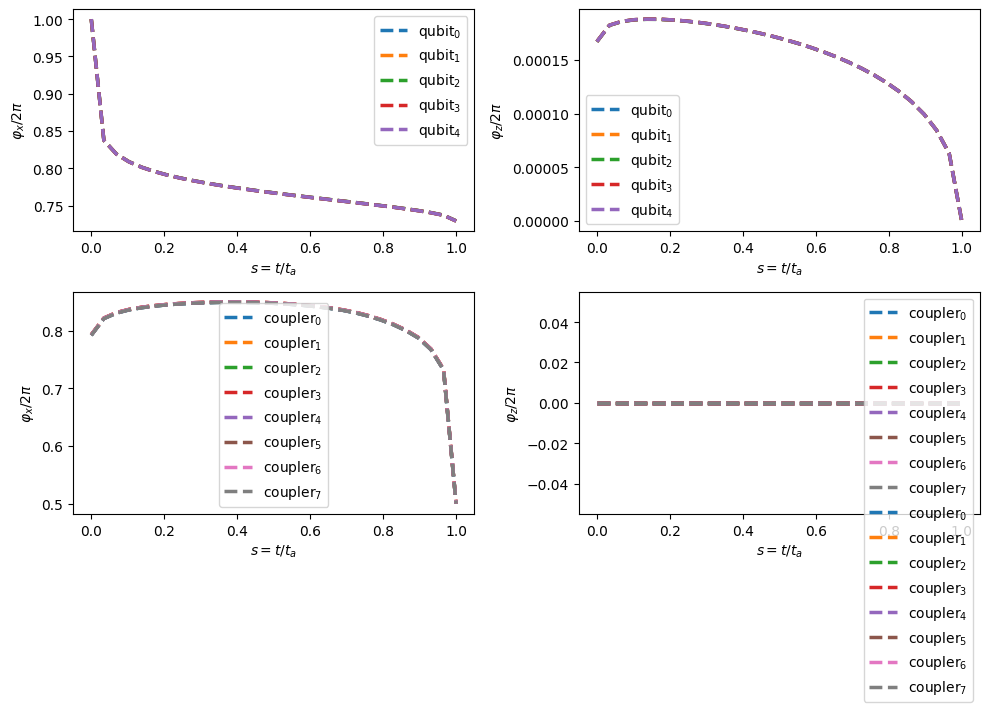

In [181]:

#with open('flux_dict_5.json', 'r') as f:
#    custom_flux_dict_pwsw = json.load(f)

plt.clf()
fig = plt.figure(num=1)
fig.set_size_inches((10, 7))

ax1 = plt.subplot(2, 2, 1)
for i, qubit_index in enumerate(circuit.qubit_indices):
    
 #   plt.plot(s, custom_flux_dict_num["phix_"+str(qubit_index)]/2/np.pi, label=r"qubit$_{0:d}$".format(i))
    plt.plot(s, custom_flux_dict_pwsw["phix_"+str(qubit_index)]/2/np.pi, '--', color="C{0:d}".format(i), lw=2.5, label=r"qubit$_{0:d}$".format(i),)
    
    plt.xlabel(r"$s=t/t_a$"); plt.ylabel(r"$\varphi_x/2\pi$")
    plt.legend()

ax2 = plt.subplot(2, 2, 2)
for i, qubit_index in enumerate(circuit.qubit_indices):
    
 #   plt.plot(s, custom_flux_dict_num["phiz_"+str(qubit_index)]/2/np.pi, label=r"qubit$_{0:d}$".format(i))
    plt.plot(s, custom_flux_dict_pwsw["phiz_"+str(qubit_index)]/2/np.pi, '--', color="C{0:d}".format(i), lw=2.5, label=r"qubit$_{0:d}$".format(i))
    
    plt.xlabel(r"$s=t/t_a$"); plt.ylabel(r"$\varphi_z/2\pi$")
    plt.legend()
    
ax3 = plt.subplot(2, 2, 3)
# plt.hlines(1, 0, 1, alpha=0.3)
for i, coupler_index in enumerate(circuit.coupler_indices):
    
 #   plt.plot(s, custom_flux_dict_num["phix_"+str(coupler_index)]/2/np.pi, label=r"coupler$_{0:d}$".format(i))
    plt.plot(s, custom_flux_dict_pwsw["phix_"+str(coupler_index)]/2/np.pi, '--', color="C{0:d}".format(i), lw=2.5, label=r"coupler$_{0:d}$".format(i))
    
    plt.xlabel(r"$s=t/t_a$"); plt.ylabel(r"$\varphi_x/2\pi$")
    plt.legend()
    
    
ax4 = plt.subplot(2, 2, 4)
for i, coupler_index in enumerate(circuit.coupler_indices):
    
 #   plt.plot(s, custom_flux_dict_num["phiz_"+str(coupler_index)]/2/np.pi, label=r"coupler$_{0:d}$".format(i))
    plt.plot(s, custom_flux_dict_pwsw["phiz_"+str(coupler_index)]/2/np.pi, '--', color="C{0:d}".format(i), lw=2.5, label=r"coupler$_{0:d}$".format(i))
    
    plt.xlabel(r"$s=t/t_a$"); plt.ylabel(r"$\varphi_z/2\pi$")
    plt.legend()
    
ax5 = plt.subplot(2, 2, 4)
for i, coupler_index in enumerate(circuit.coupler_indices):
    
 #   plt.plot(s, custom_flux_dict_num["phiz_"+str(coupler_index)]/2/np.pi, label=r"coupler$_{0:d}$".format(i))
    plt.plot(s, custom_flux_dict_pwsw["phiz_"+str(coupler_index)]/2/np.pi, '--', color="C{0:d}".format(i), lw=2.5, label=r"coupler$_{0:d}$".format(i))
    
    plt.xlabel(r"$s=t/t_a$"); plt.ylabel(r"$\varphi_z/2\pi$")
    plt.legend()    
    
    
plt.tight_layout()
plt.show()    

In order to validate the result we do the inverse apporach, from flux to ising coeff, and we compare target and obtained results:

In [183]:
ising_pwsw_dict = circuit.get_ising_pwsw(custom_flux_dict_pwsw, verbose = True)

calculating qubit isings for qubit 1 of 5
calculating qubit isings for qubit 2 of 5
calculating qubit isings for qubit 3 of 5
calculating qubit isings for qubit 4 of 5
calculating qubit isings for qubit 5 of 5
calculating coupling strength for coupler 1 of 8
calculating coupling strength for coupler 2 of 8
calculating coupling strength for coupler 3 of 8
calculating coupling strength for coupler 4 of 8
calculating coupling strength for coupler 5 of 8
calculating coupling strength for coupler 6 of 8
calculating coupling strength for coupler 7 of 8
calculating coupling strength for coupler 8 of 8


IndexError: list index out of range

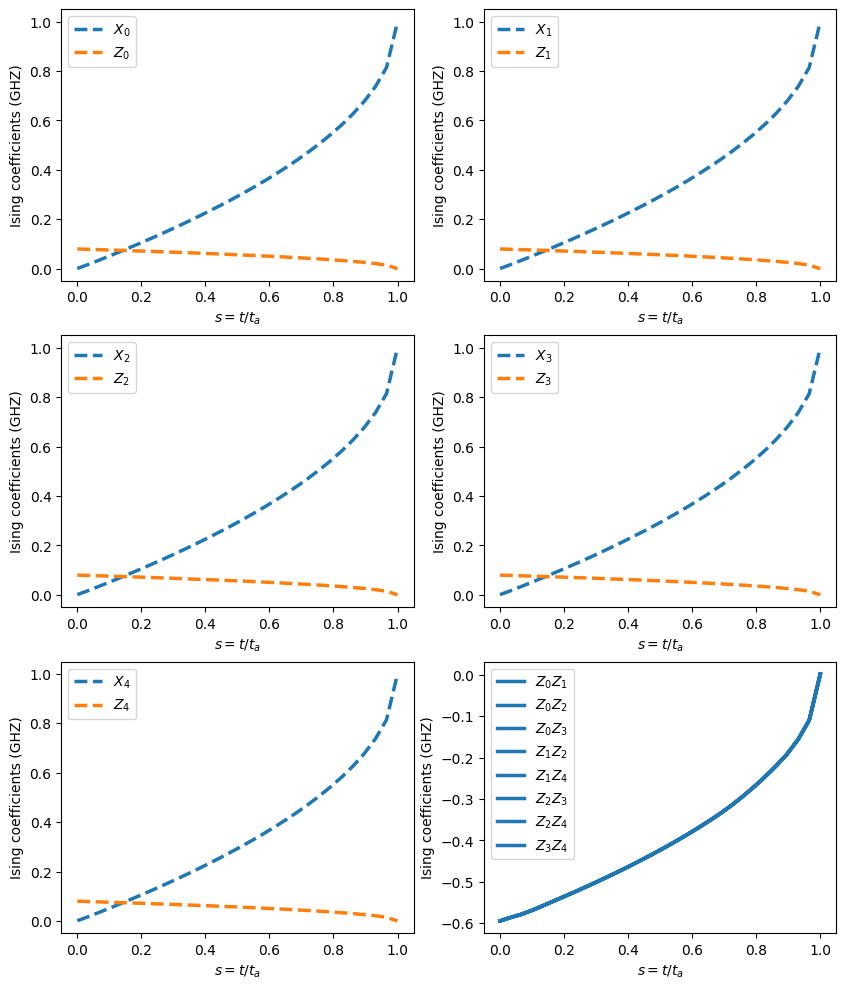

In [184]:
plt.clf()
fig = plt.figure(num=1)
fig.set_size_inches((10, 12))

for i in range(5):
    ax1 = plt.subplot(3, 2, i+1)
    
#    plt.plot(s, ising_sw_dict["x_"+str(i)]/2/np.pi, label=r"$X_{0:d}$".format(i), color="C0")
#    plt.plot(s, ising_sw_dict["z_"+str(i)]/2/np.pi, label=r"$Z_{0:d}$".format(i), color="C1")
    
    plt.plot(s, ising_pwsw_dict["x_"+str(i)]/2/np.pi, color="C0", label=r"$X_{0:d}$".format(i), ls='--', lw=2.5 )
    plt.plot(s, ising_pwsw_dict["z_"+str(i)]/2/np.pi, color="C1", label=r"$Z_{0:d}$".format(i), ls='--', lw=2.5 )
    
    plt.xlabel(r"$s=t/t_a$"); plt.ylabel(r"Ising coefficients (GHZ)")
    plt.legend()
    
labels = [[0, 1],[0, 2],[0, 3], [1, 2], [1, 4], [2, 3], [2, 4], [3, 4]]
for i in range(9):
    ax2 = plt.subplot(3, 2, 6)
    
#    plt.plot(s, ising_sw_dict["zz_"+str(labels[i][0])+','+str(labels[i][1])]/2/np.pi, 
#             label=r"$Z_{0:d}Z_{1:d}$".format(labels[i][0], labels[i][1]))
    
    plt.plot(s, ising_pwsw_dict["zz_"+str(labels[i][0])+','+str(labels[i][1])]/2/np.pi, color="C0", ls=None, lw=2.5,label=r"$Z_{0:d}Z_{1:d}$".format(labels[i][0], labels[i][1]) )
    
    plt.xlabel(r"$s=t/t_a$"); plt.ylabel(r"Ising coefficients (GHZ)")
    plt.legend()

plt.tight_layout()
plt.show()


SCALING SOLUTIONS:
One problem of QAA is that as the energy gap decreases, ground and excited states get closer and overlap, with the possbility of a transition between them. In orded to avoid it the evolution time curve features a strong increase in stepsize when the energy gap is crossed.
Possible approaches to measure the exc-grd overlap (and condsequently the energy gap) are:
- ground state is evolved forward and backward-time to calculate the overlap
- perform a Ramsey exp with initial state in a superp. of grn and exc state. By projeting the final state varying time parameter you can then extract the energy gap 
- using ancilla qbit for quantum phase estimation 
The last approach was used with Variational QAA and proved with 53 qbits (from reference [7])